**DS105M 2022 Week07 Grammar of Graphics**

**Author:** [@jonjoncardoso](github.com/jonjoncardoso)

**Date:** 8 November 2022

---

## Setup

Install `plotnine`:

In [4]:
!pip install plotnine


[notice] A new release of pip available: 22.3 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


**Import required libraries**

In [6]:
import pandas as pd

# Importing plotnine like this will make your life easier
from plotnine import *

## Download the data

-   Click [here](https://opendata.camden.gov.uk/api/views/893b-tp33/rows.csv?accessType=DOWNLOAD&bom=true&format=true) to download the On_Street_Crime_In_Camden_Map.csv file we will use in this tutorial.

    -   If that does not work for some reason, go to the [On Street Crime In Camden Map dashboard](https://opendata.camden.gov.uk/Crime-and-Criminal-Justice/On-Street-Crime-In-Camden-Map/893b-tp33), click on **Export** (right-hand side menu) and download the "CSV for Excel" version of the data.


-   Save the CSV file on the same directory where you are running this notebook

## Read the data



In [8]:
df = pd.read_csv("On_Street_Crime_In_Camden_Map.csv")

**How many rows and columns?**

In [9]:
df.shape

(347803, 20)

**What does the data look like?**

In [10]:
df.head()

,Category,Street ID,Street Name,Context,Outcome Category,Outcome Date,Service,Location Subtype,ID,Persistent ID,Epoch,Ward Code,Ward Name,Easting,Northing,Longitude,Latitude,Spatial Accuracy,Last Uploaded,Location
0,Other theft,"1,489,515",Kings Cross (station),NaN,Status update unavailable,01/08/2017,British Transport Police,Station,"64,777,250",NaN,01/04/2017,E05000143,St Pancras and Somers Town,"530,277.37","183,101.39",-0.123189,51.531800,This is only an approximation of where the cri...,11/07/2018,"(51.5318, -0.123189)"
1,Anti-social behaviour,"960,522",On or near Wellesley Place,NaN,NaN,NaN,Police Force,NaN,"51,520,755",NaN,01/09/2016,E05000143,St Pancras and Somers Town,"529,707.23","182,682.77",-0.131558,51.528169,This is only an approximation of where the cri...,11/07/2018,"(51.528169, -0.131558)"
2,Theft from the person,"965,233",On or near Avenue Road,NaN,Investigation complete; no suspect identified,01/08/2015,Police Force,NaN,"42,356,413",915131bf174019fd2fcf5aa4af305f7b2b34a763d8fcb0...,01/07/2015,E05000144,Swiss Cottage,"526,716.88","184,227.86",-0.174124,51.542741,This is only an approximation of where the cri...,05/05/2016,"(51.542741, -0.174124)"
3,Anti-social behaviour,"960,974",On or near Birkenhead Street,NaN,NaN,NaN,Police Force,NaN,"59,431,385",NaN,01/08/2017,E05000141,King's Cross,"530,390.22","182,860.71",-0.121652,51.529611,This is only an approximation of where the cri...,03/11/2017,"(51.529611, -0.121652)"
4,Drugs,"972,275",On or near Oakeshott Avenue,NaN,Offender given a drugs possession warning,01/06/2015,Police Force,NaN,"41,931,981",bd5bef6ee7b3711e69ecfc40c1c256d45336f23aeda337...,01/06/2015,E05000137,Highgate,"528,335.87","186,805.94",-0.149851,51.565544,This is only an approximation of where the cri...,21/08/2015,"(51.565544, -0.149851)"


**What are the data types?**

In [15]:
df.dtypes

Category             object
Street ID            object
Street Name          object
Context             float64
Outcome Category     object
Outcome Date         object
Service              object
Location Subtype     object
ID                   object
Persistent ID        object
Epoch                object
Ward Code            object
Ward Name            object
Easting              object
Northing             object
Longitude           float64
Latitude            float64
Spatial Accuracy     object
Last Uploaded        object
Location             object
dtype: object

**Let's pre-process the `Outcome Date` column:**

Read more about pandas date/time series funcionalities in the [pandas documentation](https://pandas.pydata.org/docs/user_guide/timeseries.html)

In [18]:
df["Outcome Date"] = pd.to_datetime(df["Outcome Date"])
df["Outcome Date"]

0        2017-01-08
1               NaT
2        2015-01-08
3               NaT
4        2015-01-06
            ...    
347798   2022-01-09
347799   2022-01-08
347800   2022-01-08
347801   2022-01-09
347802   2022-01-09
Name: Outcome Date, Length: 347803, dtype: datetime64[ns]

**I am curious about the column `Category`, what are the most common categories?**

In [19]:
df["Category"].value_counts()

Anti-social behaviour           81498
Violence and sexual offences    55245
Other theft                     50764
Theft from the person           35754
Vehicle crime                   23589
Burglary                        20669
Public order                    16968
Shoplifting                     13882
Criminal damage and arson       13234
Drugs                           11866
Robbery                         10613
Bicycle theft                    9856
Other crime                      2110
Possession of weapons            1755
Name: Category, dtype: int64

# The Grammar of Graphics

Let's make it visual!

Recommended reading: [📚 A Layered Grammar of Graphics - Hadley Wickham](https://vita.had.co.nz/papers/layered-grammar.pdf)

## What are the components of a plot?

[![**Common Layers of a graph**](fig1.png)](https://vita.had.co.nz/papers/layered-grammar.pdf)

## Some named components:

-   data and aesthetic mappings,
-   geometric objects,
-   scales

## A bar plot

The code below creates a bar plot:

-   `ggplot` initializes the plot for the data frame `df`

-   function `aes` maps the **aesthetics** of the graph

-   `geom_bar` is the **geometric object** we are using. You can consult the [geom_bar documentation](https://plotnine.readthedocs.io/en/stable/generated/plotnine.geoms.geom_bar.html) to see which aesthetics it *understands*.

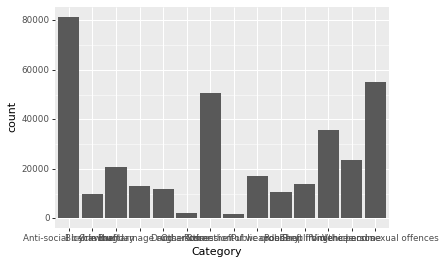

<ggplot: (160336118646)>

In [21]:
g = (
    ggplot(df, aes(x="Category")) + geom_bar()
)

g

**🎯ACTION POINT: CUSTOMIZING THE PLOT**

-   Let's work on it together, how should we improve the bar plot?

## An area bar

Using the grammar of graphics, you will often need to transform your data before you can create a plot.

For example, if you want to create an area bar in which we show number of crimes per day, we would first need to sum up the number cases.

In [26]:
## I will explain what the apply(...) bit does during the class
plot_df = df.groupby(["Outcome Date"]).apply(lambda x: pd.Series({"n": len(x)}))
plot_df

,n
Outcome Date,
2015-01-01,1674
2015-01-02,2108
2015-01-03,2542
2015-01-04,2678
2015-01-05,3077
...,...
2022-01-05,3234
2022-01-06,3221
2022-01-07,3272


The `groupby` function in pandas converts all grouped columns to indices, if we want to reuse them as columns, we need to `reset_index()`:

In [28]:
plot_df = plot_df.reset_index()
plot_df

,Outcome Date,n
0,2015-01-01,1674
1,2015-01-02,2108
2,2015-01-03,2542
3,2015-01-04,2678
4,2015-01-05,3077
...,...,...
88,2022-01-05,3234
89,2022-01-06,3221
90,2022-01-07,3272
91,2022-01-08,2767


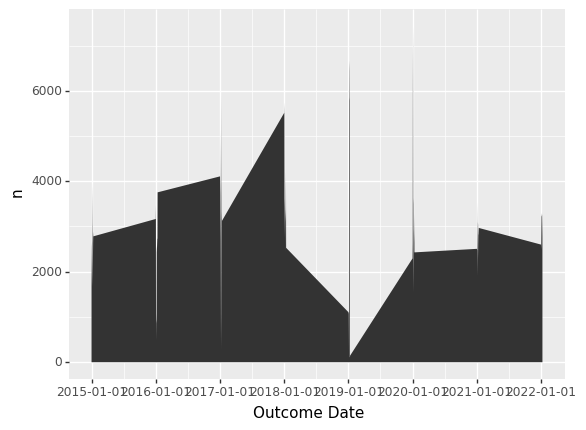

<ggplot: (160351087897)>

In [29]:
g = (
    ggplot(plot_df, aes(x="Outcome Date",y="n")) + geom_area()
)

## The `fill` aesthetic

In [30]:
plot_df = df.groupby(["Outcome Date", "Category"]).apply(lambda x: pd.Series({"n": len(x)}))
plot_df

n
Outcome Date Category                         
2015-01-01   Bicycle theft                  34
             Burglary                      167
             Criminal damage and arson      77
             Drugs                         155
             Other crime                    10
...                                        ...
2022-01-09   Robbery                        99
             Shoplifting                   130
             Theft from the person         428
             Vehicle crime                 383
             Violence and sexual offences  666

[1192 rows x 1 columns]

The `groupby` function in pandas converts all grouped columns to indices, if we want to reuse them as columns, we need to `reset_index()`:

In [31]:
plot_df = plot_df.reset_index()
plot_df

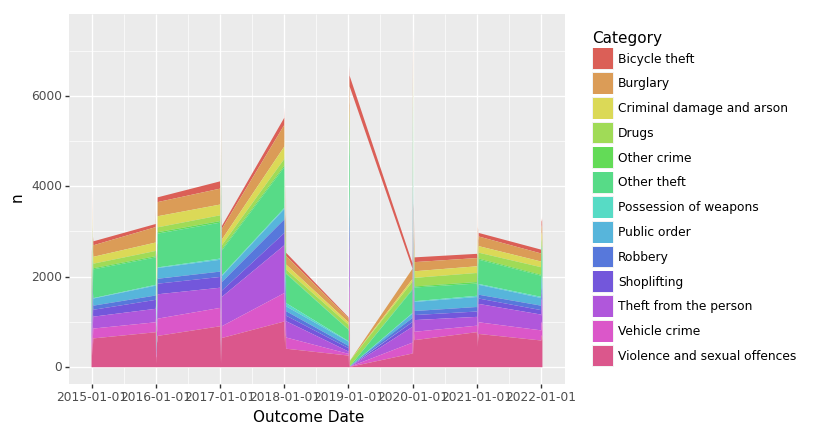

<ggplot: (160351139060)>

In [32]:
g = (
    ggplot(plot_df, aes(x="Outcome Date", y="n", fill="Category")) + geom_area()
)

g


**🎯ACTION POINT: CUSTOMIZING THE PLOT**

-   Let's work on it together, how should we improve the bar plot?

## Facets

If you want to break the plot into multiple subplots, you can use **facet**

![**Facets**](fig2.png){alt="Facets" fig-alt="Facets"}

**First let's summarise the data by Outcome Date, Category and Service**

In [34]:
plot_df = df.groupby(["Service", "Category", "Outcome Date" ]).apply(lambda x: pd.Series({"n": len(x)}))
plot_df

n
Service                  Category                     Outcome Date     
British Transport Police Bicycle theft                2015-01-01      1
                                                      2015-01-02      3
                                                      2015-01-03      4
                                                      2015-01-04      2
                                                      2015-01-05      4
...                                                                 ...
Police Force             Violence and sexual offences 2022-01-05    616
                                                      2022-01-06    655
                                                      2022-01-07    608
                                                      2022-01-08    532
                                                      2022-01-09    621

[1957 rows x 1 columns]

In [35]:
plot_df = plot_df.reset_index()

### Facet wrap:

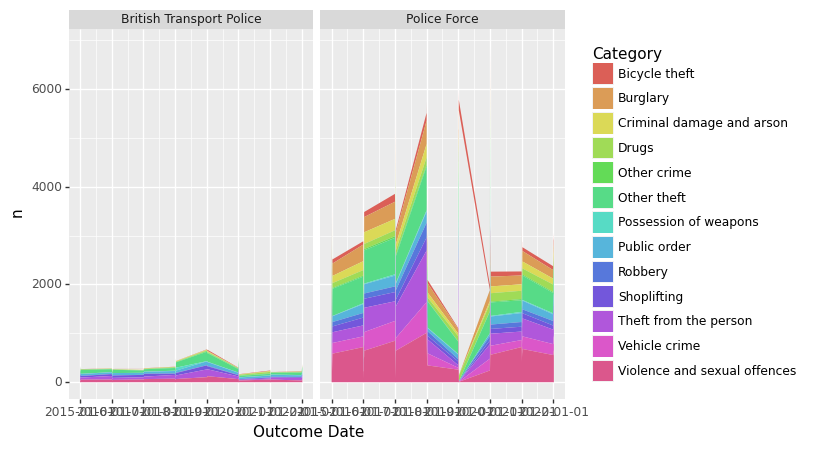

<ggplot: (160352805012)>

In [38]:
g = (
    ggplot(plot_df, aes(x="Outcome Date", y="n", fill="Category")) + 
      geom_area() + facet_wrap("~ Service")
  )
g

### Facet grid

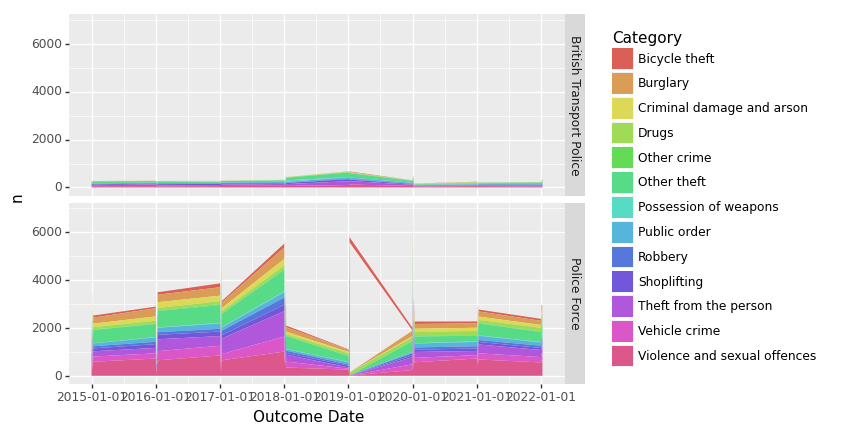

<ggplot: (160351919586)>

In [40]:
g = (
    ggplot(plot_df, aes(x="Outcome Date", y="n", fill="Category")) + 
      geom_area() + facet_grid("Service ~ .")
  )
g

**🎯ACTION POINT: CUSTOMIZING THE PLOT**

-   Let's work on it together, how should we improve the bar plot?